<a href="https://colab.research.google.com/github/Somya1911/NYC-Urban-Mobility-and-Accomodation-Trends/blob/main/dwd_somya_khatri_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**NYC’s Urban Mobility and Accommodation Trends using the Airbnb open data and trip data**

by Somya Khatri

#**Objective:**
To analyze New York City's urban mobility and accommodation trends by leveraging Airbnb open data and various trip data sources, aiming to understand the interplay between short-term lodging preferences and citywide transportation patterns. This study seeks to provide insights into seasonal and geographic variations in accommodation and mobility, and to assess the impact of these trends on urban planning and policy development.

# **Overview**
# **Airbnb Open Data**

1) What is the data? Where is it from? Provide a URL.

As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in New York City. The following Airbnb activity is included in this New York dataset:Listings, including full descriptions and average review score Reviews, including unique id for each reviewer and detailed comments Calendar, including listing id and the price and availability for that day

Original source: http://insideairbnb.com/explore/

https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata/data

Last updated: 02/28/2022
Number of observations: 102546

2) Is it a topic that interests you?

The topic of analyzing Airbnb New User Bookings alongside trip data in New York City offers a fascinating intersection of urban mobility and accommodation trends like Urban Transportation and Accommodation Dynamics, Consumer Behavior Insights, and Technological Integration in Urban Living.

3) What preliminary questions do you have of the data?

Is there a concentration of Airbnb properties in certain areas?How does the distribution relate to tourist attractions, public transport, or other amenities?

4) What is interesting about the data?

There is a data dictionary that provides a concise guide to understanding and using the data. The data is very in-depth with over 36 columns, therefore more scope for exploration.

5) What do you think will interest others about these data?

Travel enthusiasts and industry professionals would be interested in how Airbnb is reshaping lodging choices in one of the world's most visited cities.

6) What technologies, platforms, or skills will you have to learn or brush up on?

Since it is a very large dataset, working on it would require a lot of data cleaning and subsetting, therefore I will have to brush up on those skills.

# **Trip data**

1) What is the data? Where is it from? Provide a URL.

Kaggle link: https://www.kaggle.com/datasets/anandaramg/taxi-trip-data-nyc

Original source: http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml.

Number of observations: 52933
Last updated: 2021

The data is a collection of New York City taxi trip records.

2) Is it a topic that interests you?

The topic of analyzing Airbnb New User Bookings alongside taxi trip data in New York City offers a fascinating intersection of urban mobility and accommodation trends like Urban Transportation and Accommodation Dynamics, Consumer Behavior Insights, and Technological Integration in Urban Living.

3) What preliminary questions do you have of the data?

How many trips occur on a daily, weekly, or monthly basis?

Are there observable patterns or trends in trip frequency (e.g., time of day, day of the week, seasonality)

4) What is interesting about the data?

The data includes rich geospatial information that can be used to conduct detailed analyses of travel patterns within different neighborhoods, helping to understand urban dynamics more comprehensively.

5) What do you think will interest others about these data?

The dataset is a prime example of how technology, especially mobile and app-based services, is reshaping traditional industries, which can be intriguing for those interested in tech-driven business models.

6) What technologies, platforms, or skills will you have to learn or brush up on?

To work with this data, skills in data analysis and visualization are key. Familiarity with Python, specifically libraries like Pandas and Matplotlib, would be beneficial. Geospatial analysis skills could also be useful for mapping the trips.

#**D1: Library imports**#

**Setting up the environment to use the Kaggle API for downloading datasets.**

**Import Libraries:**

numpy for numerical operations and pandas for data processing and reading CSV files.

**Setting Up Kaggle API:**

1.   Creating a directory for Kaggle configuration
2.   Copying the kaggle.json file, which contains the API credentials, to the Kaggle directory.
3. Changing the file permission to read and write for the user only, to secure your API key.

This setup is essential for using the Kaggle API to access datasets directly from Kaggle within the coding environment.


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


**Fetching the data**

In [ ]:
!kaggle datasets download -d arianazmoudeh/airbnbopendata #Airbnb Open Data


airbnbopendata.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!kaggle datasets download -d anandaramg/taxi-trip-data-nyc #NYC Taxi Trip Data

taxi-trip-data-nyc.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/taxi-trip-data-nyc.zip #Trip Data

Archive:  /content/taxi-trip-data-nyc.zip
  inflating: taxi_tripdata.csv       
  inflating: trip_data_dictionary.pdf  


In [ ]:
!unzip /content/airbnbopendata.zip #Airbnb Open Data

Archive:  /content/airbnbopendata.zip
  inflating: Airbnb_Open_Data.csv    


**Import the unzipped .csv files to dataframes using pandas**

In [ ]:
airbnb_data = pd.read_csv("/content/Airbnb_Open_Data.csv", header=0, low_memory=False) #Airbnb Open Data

In [ ]:
trip_data = pd.read_csv("/content/taxi_tripdata.csv", header=0, low_memory=False ) #Trip Data

# **D2: Data pre-processing**

# **Airbnb** **Dataset**

**Obtain a concise summary information about the dataFrame, including the data types of each column, the number of non-null values, and memory usage.**

In [ ]:
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

 **Running a python script that iterates over the columns of the dataFrame and calculates the percentage of null (missing) values for each column and prints the column name along with its null rate if it has any missing values.**

**This will give us a clearer picture of the columns with missing values and the percentage as well. Therefore different mechanisms can be used accordingly that suits the different columns**


In [ ]:
for i in airbnb_data.columns:
    null_rate = airbnb_data[i].isna().sum() / len(airbnb_data) * 100
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

NAME null rate: 0.24%
host_identity_verified null rate: 0.28%
host name null rate: 0.4%
neighbourhood group null rate: 0.03%
neighbourhood null rate: 0.02%
lat null rate: 0.01%
long null rate: 0.01%
country null rate: 0.52%
country code null rate: 0.13%
instant_bookable null rate: 0.1%
cancellation_policy null rate: 0.07%
Construction year null rate: 0.21%
price null rate: 0.24%
service fee null rate: 0.27%
minimum nights null rate: 0.4%
number of reviews null rate: 0.18%
last review null rate: 15.49%
reviews per month null rate: 15.48%
review rate number null rate: 0.32%
calculated host listings count null rate: 0.31%
availability 365 null rate: 0.44%
house_rules null rate: 50.81%
license null rate: 100.0%


**Drop Columns house_rules and license which are 50% and 100% null respectively. Moreover these columns contain information that are not relevant to the scope of the analysis.**

In [ ]:
airbnb_data = airbnb_data.drop(['house_rules', 'license'], axis=1)

**A quick inspection of the dataset to get an idea of its structure, the types of data it contains, and to identify any potential issues or patterns in the data.**

In [ ]:
airbnb_data.head()

id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country  ... Construction year  price  \
0  40.64749 -73.97237  United States  ...            2020.0  $966    
1  40.75362 -73.98377  United States  ...            2007.0  $142    
2  40.80902 -73.94190  United States  ...            2005.0  $620    
3  40.68514 -73.95976  United States  ...            2005.0  $368    
4  40.79851 -73.94399  United States  ...            2009.0  $204    

  service fee minimum nights  number of reviews last review reviews per month  \
0       $193            10.0                9.0  10/19/2021              0.21   
1        $28            30.0               45.0   5/21/2022              0.38   
2       $124             3.0                0.0         NaN               NaN   
3        $74            30.0              270.0    7/5/2019              4.64   
4        $41            10.0                9.0  11/19/2018              0.10   

   review rate number  calculated host listings count availability 365  
0                 4.0                             6.0            286.0  
1                 4.0                             2.0            228.0  
2                 5.0                             1.0            352.0  
3                 4.0                             1.0            322.0  
4                 3.0                             1.0            289.0  

[5 rows x 24 columns]

**Size and structure of the dataset**

In [ ]:
airbnb_data.shape

(102599, 24)

**Now dealing with the missing values**

**Missing values in the 'reviews per month' column are replaced with the mode of that column. The mode is a common choice for imputing missing values when dealing with categorical or discrete numerical data.**

In [ ]:
airbnb_data['reviews per month'] = airbnb_data['reviews per month'].fillna(airbnb_data['reviews per month'].mode()[0])  # Replace with mode

**Converting 'last review' column to pandas 'datetime' column.**

In [ ]:
airbnb_data['last review'] = pd.to_datetime(airbnb_data['last review'])

**Missing values in the 'last review' column are replaced with the mode of that column. The mode is a common choice for imputing missing values when dealing with categorical or discrete numerical data.**

In [ ]:
airbnb_data['last review'] = airbnb_data['last review'].fillna(airbnb_data['last review'].mode()[0])  # Replace with mode

**Since the focus of the analysis is on geographical positioning, we will drop the rows with null 'neighbourhood group', 'neighbourhood', 'lat', 'long' and we will drop the 'Country' and 'Country Code' column since we already the know the data is for 'NYC' only so the value is going to be same for all the rows.**

In [ ]:
airbnb_data.dropna(subset=['neighbourhood group', 'neighbourhood', 'lat', 'long'], inplace=True)


**Replace missing 'NAME' with 'unnamed', replace host_identity_verified with the mode value of the column, replace NaN 'host name' values with 'no name', replace missing 'instant_bookable' values with mode of the column, missing 'cancellation policy' with 'flexible', 'construction year' with mode value, 'price' with mode value, 'service fee' with mode value, 'minimum nights' with mode value,'number of reviews' with mode value, 'review rate number' with mode value, 'calculated host listings count' with mode value, 'availablility 365' with mode value.**

In [ ]:
airbnb_data['NAME'] = airbnb_data['NAME'].fillna('no name')
airbnb_data['host_identity_verified'] = airbnb_data['host_identity_verified'].fillna(airbnb_data['host_identity_verified'].mode()[0])  # Replace with mode
airbnb_data['host name'] = airbnb_data['host name'].fillna('no name')
airbnb_data['instant_bookable'] = airbnb_data['instant_bookable'].fillna(airbnb_data['instant_bookable'].mode()[0])
airbnb_data['cancellation_policy'] = airbnb_data['cancellation_policy'].fillna('flexible')
airbnb_data['Construction year'] = airbnb_data['Construction year'].fillna(airbnb_data['Construction year'].mode()[0])
airbnb_data['price'] = airbnb_data['price'].fillna(airbnb_data['price'].mode()[0])
airbnb_data['service fee'] = airbnb_data['service fee'].fillna(airbnb_data['service fee'].mode()[0])
airbnb_data['minimum nights'] = airbnb_data['minimum nights'].fillna(airbnb_data['minimum nights'].mode()[0])
airbnb_data['number of reviews'] = airbnb_data['number of reviews'].fillna(airbnb_data['number of reviews'].mode()[0])
airbnb_data['review rate number'] = airbnb_data['review rate number'].fillna(airbnb_data['review rate number'].mode()[0])
airbnb_data['calculated host listings count'] = airbnb_data['calculated host listings count'].fillna(airbnb_data['calculated host listings count'].mode()[0])
airbnb_data['availability 365'] = airbnb_data['availability 365'].fillna(airbnb_data['availability 365'].mode()[0])


In [ ]:
# Check for NaN values in each column
nan_per_column = airbnb_data.isna().sum()
print("Number of NaN values in each column:\n", nan_per_column)

Number of NaN values in each column:
 id                                  0
NAME                                0
host id                             0
host_identity_verified              0
host name                           0
neighbourhood group                 0
neighbourhood                       0
lat                                 0
long                                0
country                           529
country code                      128
instant_bookable                    0
cancellation_policy                 0
room type                           0
Construction year                   0
price                               0
service fee                         0
minimum nights                      0
number of reviews                   0
last review                         0
reviews per month                   0
review rate number                  0
calculated host listings count      0
availability 365                    0
dtype: int64


We will drop the 'country' and 'country code' column since we already know we are working with NYC data only so the values for these two columns would be the same and redudand.

In [ ]:
airbnb_data.drop(['country', 'country code'], axis=1, inplace=True)



In [ ]:
airbnb_data.head()

id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                           no name  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2            unconfirmed     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long  instant_bookable  ... Construction year  price  \
0  40.64749 -73.97237             False  ...            2020.0  $966    
1  40.75362 -73.98377             False  ...            2007.0  $142    
2  40.80902 -73.94190              True  ...            2005.0  $620    
3  40.68514 -73.95976              True  ...            2005.0  $368    
4  40.79851 -73.94399             False  ...            2009.0  $204    

   service fee minimum nights number of reviews  last review  \
0        $193            10.0               9.0   2021-10-19   
1         $28            30.0              45.0   2022-05-21   
2        $124             3.0               0.0   2019-06-23   
3         $74            30.0             270.0   2019-07-05   
4         $41            10.0               9.0   2018-11-19   

   reviews per month review rate number  calculated host listings count  \
0               0.21                4.0                             6.0   
1               0.38                4.0                             2.0   
2               0.03                5.0                             1.0   
3               4.64                4.0                             1.0   
4               0.10                3.0                             1.0   

   availability 365  
0             286.0  
1             228.0  
2             352.0  
3             322.0  
4             289.0  

[5 rows x 22 columns]

In [ ]:
airbnb_data.shape

(102546, 23)

# **Trip** **Dataset**


**Obtain a concise summary information about the dataFrame, including the data types of each column, the number of non-null values, and memory usage.**

In [ ]:
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83691 entries, 0 to 83690
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               51173 non-null  float64
 1   lpep_pickup_datetime   83691 non-null  object 
 2   lpep_dropoff_datetime  83691 non-null  object 
 3   store_and_fwd_flag     51173 non-null  object 
 4   RatecodeID             51173 non-null  float64
 5   PULocationID           83691 non-null  int64  
 6   DOLocationID           83691 non-null  int64  
 7   passenger_count        51173 non-null  float64
 8   trip_distance          83691 non-null  float64
 9   fare_amount            83691 non-null  float64
 10  extra                  83691 non-null  float64
 11  mta_tax                83691 non-null  float64
 12  tip_amount             83691 non-null  float64
 13  tolls_amount           83691 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

**The taxi trip dataset contains the locations for pickup and drop-off but the values for those columns are not actual location names, instead location IDs are used. To solve this problem I have used another dataset called the 'Taxi-zones' which is a standard dataset used in NYC. Using this dataset I am going to map the location IDs in my main Taxi trip datasets so that it can be used for analysis.**

In [ ]:
lookup_df = pd.read_csv('taxi_zones.csv')

In [ ]:
# Merge for Pick-Up Location using PULocationID
trip_data = pd.merge(trip_data, lookup_df[['LocationID', 'zone', 'borough']], left_on='PULocationID', right_on='LocationID', how='left')

# Rename columns for clarity
trip_data.rename(columns={'zone': 'PUZone', 'borough': 'PUBorough'}, inplace=True)

# Optionally, drop the extra LocationID column if it's redundant
trip_data.drop('LocationID', axis=1, inplace=True)


In [ ]:
trip_data = trip_data.merge(lookup_df[['LocationID', 'the_geom']], left_on='DOLocationID', right_on='LocationID', how='left')

In [ ]:
trip_data.rename(columns={'PUthe_geom': 'DOThe_geom'}, inplace=True)


In [ ]:
trip_data.drop('LocationID', axis=1, inplace=True)

In [ ]:
# Merge for Pick-Up Location using DOLocationID
trip_data = pd.merge(trip_data, lookup_df[['LocationID', 'zone', 'borough']], left_on='DOLocationID', right_on='LocationID', how='left')

# Rename columns for clarity
trip_data.rename(columns={'zone': 'DOZone', 'borough': 'DOBorough'}, inplace=True)

# Optionally, drop the extra LocationID column if it's redundant
trip_data.drop('LocationID', axis=1, inplace=True)



In [ ]:
trip_data = trip_data.merge(lookup_df[['LocationID', 'the_geom']], left_on='PULocationID', right_on='LocationID', how='left')

In [ ]:
trip_data.rename(columns={'the_geom': 'PUThe_geom'}, inplace=True)


In [ ]:
trip_data.drop('LocationID', axis=1, inplace=True)

In [ ]:
trip_data.head()

VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0       1.0  2021-07-01 00:30:52   2021-07-01 00:35:36                  N   
1       2.0  2021-07-01 00:25:36   2021-07-01 01:01:31                  N   
2       2.0  2021-07-01 00:05:58   2021-07-01 00:12:00                  N   
3       2.0  2021-07-01 00:41:40   2021-07-01 00:47:23                  N   
4       2.0  2021-07-01 00:51:32   2021-07-01 00:58:46                  N   

   RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0         1.0            74           168              1.0           1.20   
1         1.0           116           265              2.0          13.69   
2         1.0            97            33              1.0           0.95   
3         1.0            74            42              1.0           1.24   
4         1.0            42           244              1.0           1.10   

   fare_amount  ...  total_amount  payment_type  trip_type  \
0          6.0  ...          7.30           2.0        1.0   
1         42.0  ...         43.30           2.0        1.0   
2          6.5  ...         10.14           1.0        1.0   
3          6.5  ...          7.80           2.0        1.0   
4          7.0  ...          8.30           2.0        1.0   

   congestion_surcharge                PUZone  PUBorough  \
0                   0.0     East Harlem North  Manhattan   
1                   0.0      Hamilton Heights  Manhattan   
2                   0.0           Fort Greene   Brooklyn   
3                   0.0     East Harlem North  Manhattan   
4                   0.0  Central Harlem North  Manhattan   

                                          the_geom_x  \
0  MULTIPOLYGON (((-73.92480953899991 40.81565901...   
1                                                NaN   
2  MULTIPOLYGON (((-73.99619227264343 40.70337714...   
3  MULTIPOLYGON (((-73.93436121591056 40.83620061...   
4  MULTIPOLYGON (((-73.94068822000003 40.85131543...   

                     DOZone  DOBorough  \
0    Mott Haven/Port Morris      Bronx   
1                       NaN        NaN   
2          Brooklyn Heights   Brooklyn   
3      Central Harlem North  Manhattan   
4  Washington Heights South  Manhattan   

                                          the_geom_y  
0  MULTIPOLYGON (((-73.93380589881859 40.81651249...  
1  MULTIPOLYGON (((-73.93924885699987 40.82829635...  
2  MULTIPOLYGON (((-73.9693409769999 40.695768429...  
3  MULTIPOLYGON (((-73.93380589881859 40.81651249...  
4  MULTIPOLYGON (((-73.93436121591056 40.83620061...  

[5 rows x 26 columns]

In [ ]:
# Merge the_geom for Pick-Up Location
trip_data = trip_data.merge(lookup_df[['LocationID', 'the_geom']], left_on='PULocationID', right_on='LocationID', how='left')

# Rename the_geom column to differentiate it as Pick-Up Location geometry
trip_data.rename(columns={'the_geom': 'PUThe_geom'}, inplace=True)

# Optionally, drop the extra LocationID column if it's redundant
trip_data.drop('LocationID', axis=1, inplace=True)


In [ ]:
# Merge the_geom for Drop-Off Location
trip_data = trip_data.merge(lookup_df[['LocationID', 'the_geom']], left_on='DOLocationID', right_on='LocationID', how='left')

# Rename the_geom column to differentiate it as Drop-Off Location geometry
trip_data.rename(columns={'the_geom': 'DOThe_geom'}, inplace=True)

# Optionally, drop the extra LocationID column if it's redundant
trip_data.drop('LocationID', axis=1, inplace=True)


**Trip dataset with the new columns containing actual location names**

In [ ]:
trip_data.head()

VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0       1.0  2021-07-01 00:30:52   2021-07-01 00:35:36                  N   
1       2.0  2021-07-01 00:25:36   2021-07-01 01:01:31                  N   
2       2.0  2021-07-01 00:05:58   2021-07-01 00:12:00                  N   
3       2.0  2021-07-01 00:41:40   2021-07-01 00:47:23                  N   
4       2.0  2021-07-01 00:51:32   2021-07-01 00:58:46                  N   

   RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0         1.0            74           168              1.0           1.20   
1         1.0           116           265              2.0          13.69   
2         1.0            97            33              1.0           0.95   
3         1.0            74            42              1.0           1.24   
4         1.0            42           244              1.0           1.10   

   fare_amount  ...  trip_type  congestion_surcharge                PUZone  \
0          6.0  ...        1.0                   0.0     East Harlem North   
1         42.0  ...        1.0                   0.0      Hamilton Heights   
2          6.5  ...        1.0                   0.0           Fort Greene   
3          6.5  ...        1.0                   0.0     East Harlem North   
4          7.0  ...        1.0                   0.0  Central Harlem North   

   PUBorough                                         the_geom_x  \
0  Manhattan  MULTIPOLYGON (((-73.92480953899991 40.81565901...   
1  Manhattan                                                NaN   
2   Brooklyn  MULTIPOLYGON (((-73.99619227264343 40.70337714...   
3  Manhattan  MULTIPOLYGON (((-73.93436121591056 40.83620061...   
4  Manhattan  MULTIPOLYGON (((-73.94068822000003 40.85131543...   

                     DOZone  DOBorough  \
0    Mott Haven/Port Morris      Bronx   
1                       NaN        NaN   
2          Brooklyn Heights   Brooklyn   
3      Central Harlem North  Manhattan   
4  Washington Heights South  Manhattan   

                                          the_geom_y  \
0  MULTIPOLYGON (((-73.93380589881859 40.81651249...   
1  MULTIPOLYGON (((-73.93924885699987 40.82829635...   
2  MULTIPOLYGON (((-73.9693409769999 40.695768429...   
3  MULTIPOLYGON (((-73.93380589881859 40.81651249...   
4  MULTIPOLYGON (((-73.93436121591056 40.83620061...   

                                          PUThe_geom  \
0  MULTIPOLYGON (((-73.93380589881859 40.81651249...   
1  MULTIPOLYGON (((-73.93924885699987 40.82829635...   
2  MULTIPOLYGON (((-73.9693409769999 40.695768429...   
3  MULTIPOLYGON (((-73.93380589881859 40.81651249...   
4  MULTIPOLYGON (((-73.93436121591056 40.83620061...   

                                          DOThe_geom  
0  MULTIPOLYGON (((-73.92480953899991 40.81565901...  
1                                                NaN  
2  MULTIPOLYGON (((-73.99619227264343 40.70337714...  
3  MULTIPOLYGON (((-73.93436121591056 40.83620061...  
4  MULTIPOLYGON (((-73.94068822000003 40.85131543...  

[5 rows x 28 columns]

**Running a python script that iterates over the columns of the dataFrame and calculates the percentage of null (missing) values for each column and prints the column name along with its null rate if it has any missing values.**

**This will give us a clearer picture of the columns with missing values and the percentage as well. Therefore different mechanisms can be used accordingly that suits the different columns**

In [ ]:
for i in trip_data.columns:
    null_rate = trip_data[i].isna().sum() / len(trip_data) * 100
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

VendorID null rate: 39.2%
store_and_fwd_flag null rate: 39.2%
RatecodeID null rate: 39.2%
passenger_count null rate: 39.2%
ehail_fee null rate: 100.0%
payment_type null rate: 39.2%
trip_type null rate: 39.2%
congestion_surcharge null rate: 39.2%
PUZone null rate: 0.46%
PUBorough null rate: 0.46%
the_geom_x null rate: 1.06%
DOZone null rate: 1.06%
DOBorough null rate: 1.06%
the_geom_y null rate: 0.46%
PUThe_geom null rate: 0.46%
DOThe_geom null rate: 1.06%


**Dropping columns not relevant to the scope of the analysis**

In [ ]:
trip_data.drop(['VendorID', 'store_and_fwd_flag', 'ehail_fee', 'congestion_surcharge'], axis=1, inplace=True)

In [ ]:
trip_data.shape

(88570, 24)

**Since the focus of the analysis is on geographical positioning, we will drop the rows with null values for pickup and drop off and related columns**

In [ ]:
trip_data.dropna(subset=['PUZone'], inplace=True)


In [ ]:
trip_data.dropna(subset=['PUBorough'], inplace=True)
trip_data.dropna(subset=['DOZone'], inplace=True)
trip_data.dropna(subset=['DOBorough'], inplace=True)
trip_data.dropna(subset=['PUThe_geom'], inplace=True)
trip_data.dropna(subset=['DOThe_geom'], inplace=True)

In [ ]:
trip_data.dropna(subset=['trip_type'], inplace=True)

**Since the values for the columns 'total_amount', 'trip_distance', 'fare amount', 'extra','mta_tax','tip_amount','tolls_amount' cannot be negative, we are going to take their absolute values only to ensure correct analysis.**

In [ ]:
len(trip_data[trip_data['total_amount'] <= 0])

365

In [ ]:
trip_data['total_amount'] = trip_data['total_amount'].abs()

In [ ]:
trip_data['trip_distance'] = trip_data['trip_distance'].abs()

In [ ]:
trip_data['fare_amount']= trip_data['fare_amount'].abs()

In [ ]:
 trip_data['extra'] = trip_data['extra'].abs()
 trip_data['mta_tax']= trip_data['mta_tax'].abs()
 trip_data['tip_amount']= trip_data['tip_amount'].abs()
 trip_data['tolls_amount']= trip_data['tolls_amount'].abs()


In [ ]:
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52933 entries, 0 to 53853
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   lpep_pickup_datetime   52933 non-null  object 
 1   lpep_dropoff_datetime  52933 non-null  object 
 2   RatecodeID             52933 non-null  float64
 3   PULocationID           52933 non-null  int64  
 4   DOLocationID           52933 non-null  int64  
 5   passenger_count        52933 non-null  float64
 6   trip_distance          52933 non-null  float64
 7   fare_amount            52933 non-null  float64
 8   extra                  52933 non-null  float64
 9   mta_tax                52933 non-null  float64
 10  tip_amount             52933 non-null  float64
 11  tolls_amount           52933 non-null  float64
 12  improvement_surcharge  52933 non-null  float64
 13  total_amount           52933 non-null  float64
 14  payment_type           52933 non-null  float64
 15  tr

**Converting pickup and dropoff datetime columns to pandas datetime allowing for easier manipulation and analysis of date and time-related operations**

In [ ]:
trip_data['lpep_pickup_datetime'] = pd.to_datetime(trip_data['lpep_pickup_datetime'])
trip_data['lpep_dropoff_datetime'] = pd.to_datetime(trip_data['lpep_dropoff_datetime'])

In [ ]:
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52933 entries, 0 to 53853
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   lpep_pickup_datetime   52933 non-null  datetime64[ns]
 1   lpep_dropoff_datetime  52933 non-null  datetime64[ns]
 2   RatecodeID             52933 non-null  float64       
 3   PULocationID           52933 non-null  int64         
 4   DOLocationID           52933 non-null  int64         
 5   passenger_count        52933 non-null  float64       
 6   trip_distance          52933 non-null  float64       
 7   fare_amount            52933 non-null  float64       
 8   extra                  52933 non-null  float64       
 9   mta_tax                52933 non-null  float64       
 10  tip_amount             52933 non-null  float64       
 11  tolls_amount           52933 non-null  float64       
 12  improvement_surcharge  52933 non-null  float64       
 13  t

**Adding the duration column to our trip dataset**

In [ ]:
trip_data['duration'] = trip_data['lpep_dropoff_datetime'] - trip_data['lpep_pickup_datetime']

In [ ]:
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52933 entries, 0 to 53853
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   lpep_pickup_datetime   52933 non-null  datetime64[ns] 
 1   lpep_dropoff_datetime  52933 non-null  datetime64[ns] 
 2   RatecodeID             52933 non-null  float64        
 3   PULocationID           52933 non-null  int64          
 4   DOLocationID           52933 non-null  int64          
 5   passenger_count        52933 non-null  float64        
 6   trip_distance          52933 non-null  float64        
 7   fare_amount            52933 non-null  float64        
 8   extra                  52933 non-null  float64        
 9   mta_tax                52933 non-null  float64        
 10  tip_amount             52933 non-null  float64        
 11  tolls_amount           52933 non-null  float64        
 12  improvement_surcharge  52933 non-null  float64

In [ ]:
trip_data.head()

lpep_pickup_datetime lpep_dropoff_datetime  RatecodeID  PULocationID  \
0  2021-07-01 00:30:52   2021-07-01 00:35:36         1.0            74   
2  2021-07-01 00:05:58   2021-07-01 00:12:00         1.0            97   
3  2021-07-01 00:41:40   2021-07-01 00:47:23         1.0            74   
4  2021-07-01 00:51:32   2021-07-01 00:58:46         1.0            42   
5  2021-07-01 00:05:00   2021-07-01 00:11:50         1.0            24   

   DOLocationID  passenger_count  trip_distance  fare_amount  extra  mta_tax  \
0           168              1.0           1.20          6.0   0.50      0.5   
2            33              1.0           0.95          6.5   0.50      0.5   
3            42              1.0           1.24          6.5   0.50      0.5   
4           244              1.0           1.10          7.0   0.50      0.5   
5           239              1.0           1.90          8.0   3.25      0.5   

   ...  trip_type                PUZone  PUBorough  \
0  ...        1.0     East Harlem North  Manhattan   
2  ...        1.0           Fort Greene   Brooklyn   
3  ...        1.0     East Harlem North  Manhattan   
4  ...        1.0  Central Harlem North  Manhattan   
5  ...        1.0          Bloomingdale  Manhattan   

                                          the_geom_x  \
0  MULTIPOLYGON (((-73.92480953899991 40.81565901...   
2  MULTIPOLYGON (((-73.99619227264343 40.70337714...   
3  MULTIPOLYGON (((-73.93436121591056 40.83620061...   
4  MULTIPOLYGON (((-73.94068822000003 40.85131543...   
5  MULTIPOLYGON (((-73.97501417199996 40.78768560...   

                     DOZone  DOBorough  \
0    Mott Haven/Port Morris      Bronx   
2          Brooklyn Heights   Brooklyn   
3      Central Harlem North  Manhattan   
4  Washington Heights South  Manhattan   
5     Upper West Side South  Manhattan   

                                          the_geom_y  \
0  MULTIPOLYGON (((-73.93380589881859 40.81651249...   
2  MULTIPOLYGON (((-73.9693409769999 40.695768429...   
3  MULTIPOLYGON (((-73.93380589881859 40.81651249...   
4  MULTIPOLYGON (((-73.93436121591056 40.83620061...   
5  MULTIPOLYGON (((-73.95953658899997 40.79871852...   

                                          PUThe_geom  \
0  MULTIPOLYGON (((-73.93380589881859 40.81651249...   
2  MULTIPOLYGON (((-73.9693409769999 40.695768429...   
3  MULTIPOLYGON (((-73.93380589881859 40.81651249...   
4  MULTIPOLYGON (((-73.93436121591056 40.83620061...   
5  MULTIPOLYGON (((-73.95953658899997 40.79871852...   

                                          DOThe_geom        duration  
0  MULTIPOLYGON (((-73.92480953899991 40.81565901... 0 days 00:04:44  
2  MULTIPOLYGON (((-73.99619227264343 40.70337714... 0 days 00:06:02  
3  MULTIPOLYGON (((-73.93436121591056 40.83620061... 0 days 00:05:43  
4  MULTIPOLYGON (((-73.94068822000003 40.85131543... 0 days 00:07:14  
5  MULTIPOLYGON (((-73.97501417199996 40.78768560... 0 days 00:06:50  

[5 rows x 25 columns]

**The data dictinary provided along with the trip dataset had corresponding values for the different IDs used in the dataset. On the basis of the conditions given, we are going to replace the values for each of the columns which have IDs instead of actual data. This will help us better in doing the analysis.**

In [ ]:
# Define conditions and corresponding replacement values
conditions1 = [
    trip_data['RatecodeID'] == 1.0,  # Condition 1
    trip_data['RatecodeID'] == 2.0,  # Condition 2
    trip_data['RatecodeID'] == 3.0, # Condition 3
    trip_data['RatecodeID'] == 4.0,
    trip_data['RatecodeID'] == 5.0,
    trip_data['RatecodeID'] == 6.0
  ]

choices1 = [
    'Standard rate',  # Replacement for Condition 1
    'JFK',   # Replacement for Condition 2
    'Newark', # Replacement for Condition 3
    'Nassau/Westchester',
    'Negotiated fare',
    'Group ride'
]

# Apply conditional replacement
trip_data['RatecodeID'] = np.select(conditions1, choices1, default=trip_data['RatecodeID'])

In [ ]:
# Define conditions and corresponding replacement values
conditions2 = [
    trip_data['trip_type'] == 1.0,  # Condition 1
    trip_data['trip_type'] == 2.0,  # Condition 2

  ]

choices2 = [
    'Inner City',  # Replacement for Condition 1
    'Outer City',   # Replacement for Condition 2

]

# Apply conditional replacement
trip_data['trip_type'] = np.select(conditions2, choices2, default=trip_data['trip_type'])

In [ ]:
trip_data.head()

lpep_pickup_datetime lpep_dropoff_datetime     RatecodeID  PULocationID  \
0  2021-07-01 00:30:52   2021-07-01 00:35:36  Standard rate            74   
2  2021-07-01 00:05:58   2021-07-01 00:12:00  Standard rate            97   
3  2021-07-01 00:41:40   2021-07-01 00:47:23  Standard rate            74   
4  2021-07-01 00:51:32   2021-07-01 00:58:46  Standard rate            42   
5  2021-07-01 00:05:00   2021-07-01 00:11:50  Standard rate            24   

   DOLocationID  passenger_count  trip_distance  fare_amount  extra  mta_tax  \
0           168              1.0           1.20          6.0   0.50      0.5   
2            33              1.0           0.95          6.5   0.50      0.5   
3            42              1.0           1.24          6.5   0.50      0.5   
4           244              1.0           1.10          7.0   0.50      0.5   
5           239              1.0           1.90          8.0   3.25      0.5   

   ...   trip_type                PUZone  PUBorough  \
0  ...  Inner City     East Harlem North  Manhattan   
2  ...  Inner City           Fort Greene   Brooklyn   
3  ...  Inner City     East Harlem North  Manhattan   
4  ...  Inner City  Central Harlem North  Manhattan   
5  ...  Inner City          Bloomingdale  Manhattan   

                                          the_geom_x  \
0  MULTIPOLYGON (((-73.92480953899991 40.81565901...   
2  MULTIPOLYGON (((-73.99619227264343 40.70337714...   
3  MULTIPOLYGON (((-73.93436121591056 40.83620061...   
4  MULTIPOLYGON (((-73.94068822000003 40.85131543...   
5  MULTIPOLYGON (((-73.97501417199996 40.78768560...   

                     DOZone  DOBorough  \
0    Mott Haven/Port Morris      Bronx   
2          Brooklyn Heights   Brooklyn   
3      Central Harlem North  Manhattan   
4  Washington Heights South  Manhattan   
5     Upper West Side South  Manhattan   

                                          the_geom_y  \
0  MULTIPOLYGON (((-73.93380589881859 40.81651249...   
2  MULTIPOLYGON (((-73.9693409769999 40.695768429...   
3  MULTIPOLYGON (((-73.93380589881859 40.81651249...   
4  MULTIPOLYGON (((-73.93436121591056 40.83620061...   
5  MULTIPOLYGON (((-73.95953658899997 40.79871852...   

                                          PUThe_geom  \
0  MULTIPOLYGON (((-73.93380589881859 40.81651249...   
2  MULTIPOLYGON (((-73.9693409769999 40.695768429...   
3  MULTIPOLYGON (((-73.93380589881859 40.81651249...   
4  MULTIPOLYGON (((-73.93436121591056 40.83620061...   
5  MULTIPOLYGON (((-73.95953658899997 40.79871852...   

                                          DOThe_geom        duration  
0  MULTIPOLYGON (((-73.92480953899991 40.81565901... 0 days 00:04:44  
2  MULTIPOLYGON (((-73.99619227264343 40.70337714... 0 days 00:06:02  
3  MULTIPOLYGON (((-73.93436121591056 40.83620061... 0 days 00:05:43  
4  MULTIPOLYGON (((-73.94068822000003 40.85131543... 0 days 00:07:14  
5  MULTIPOLYGON (((-73.97501417199996 40.78768560... 0 days 00:06:50  

[5 rows x 25 columns]

In [ ]:
# Define conditions and corresponding replacement values
conditions3 = [
    trip_data['RatecodeID'] == 'Inner City',  # Condition 1
    trip_data['RatecodeID'] == 'Outer City',  # Condition 2
    trip_data['RatecodeID'] == 3.0, # Condition 3
    trip_data['RatecodeID'] == 4.0,
    trip_data['RatecodeID'] == 5.0,
    trip_data['RatecodeID'] == 6.0
  ]

choices3 = [
    'Standard rate',  # Replacement for Condition 1
    'JFK',   # Replacement for Condition 2
    'Newark', # Replacement for Condition 3
    'Nassau/Westchester',
    'Negotiated fare',
    'Group ride'
]

# Apply conditional replacement
trip_data['RatecodeID'] = np.select(conditions3, choices3, default=trip_data['RatecodeID'])

In [ ]:
# Define conditions and corresponding replacement values
conditions4 = [
    trip_data['payment_type'] == 1.0,  # Condition 1
    trip_data['payment_type'] == 2.0,  # Condition 2
    trip_data['payment_type'] == 3.0, # Condition 3
    trip_data['payment_type'] == 4.0,
    trip_data['payment_type'] == 5.0,
    trip_data['payment_type'] == 6.0
  ]

choices4 = ['Credit card',
'Cash',
'No charge',
'Dispute',
'Unknown',
'Voided trip'
  ]

# Apply conditional replacement
trip_data['payment_type'] = np.select(conditions4, choices4, default=trip_data['payment_type'])

In [ ]:
trip_data.tail()

lpep_pickup_datetime lpep_dropoff_datetime       RatecodeID  \
53849  2021-07-31 22:58:03   2021-07-31 23:16:59    Standard rate   
53850  2021-07-31 23:24:30   2021-07-31 23:36:26    Standard rate   
53851  2021-07-31 23:42:19   2021-07-31 23:43:40    Standard rate   
53852  2021-07-31 23:02:05   2021-07-31 23:20:49    Standard rate   
53853  2021-07-31 23:25:36   2021-07-31 23:38:28  Negotiated fare   

       PULocationID  DOLocationID  passenger_count  trip_distance  \
53849            41           151              1.0           1.00   
53850            74           151              1.0           2.28   
53851           166            24              1.0           0.21   
53852           223           112              1.0           4.09   
53853            93           134              1.0           5.70   

       fare_amount  extra  mta_tax  ...   trip_type  \
53849          5.5    0.5      0.5  ...  Inner City   
53850         10.5    0.5      0.5  ...  Inner City   
53851          3.0    0.5      0.5  ...  Inner City   
53852         16.0    0.5      0.5  ...  Inner City   
53853         40.0    0.0      0.0  ...  Outer City   

                             PUZone  PUBorough  \
53849                Central Harlem  Manhattan   
53850             East Harlem North  Manhattan   
53851           Morningside Heights  Manhattan   
53852                      Steinway     Queens   
53853  Flushing Meadows-Corona Park     Queens   

                                              the_geom_x            DOZone  \
53849  MULTIPOLYGON (((-73.96371096499993 40.79301293...  Manhattan Valley   
53850  MULTIPOLYGON (((-73.96371096499993 40.79301293...  Manhattan Valley   
53851  MULTIPOLYGON (((-73.95953658899997 40.79871852...      Bloomingdale   
53852  MULTIPOLYGON (((-73.95439555417066 40.73911477...        Greenpoint   
53853  MULTIPOLYGON (((-73.82288529599995 40.71192805...       Kew Gardens   

       DOBorough                                         the_geom_y  \
53849  Manhattan  MULTIPOLYGON (((-73.94773985499985 40.80959972...   
53850  Manhattan  MULTIPOLYGON (((-73.93380589881859 40.81651249...   
53851  Manhattan  MULTIPOLYGON (((-73.95707738499995 40.81429809...   
53852   Brooklyn  MULTIPOLYGON (((-73.90649492923363 40.79018099...   
53853     Queens  MULTIPOLYGON (((-73.8569635593979 40.764074427...   

                                              PUThe_geom  \
53849  MULTIPOLYGON (((-73.94773985499985 40.80959972...   
53850  MULTIPOLYGON (((-73.93380589881859 40.81651249...   
53851  MULTIPOLYGON (((-73.95707738499995 40.81429809...   
53852  MULTIPOLYGON (((-73.90649492923363 40.79018099...   
53853  MULTIPOLYGON (((-73.8569635593979 40.764074427...   

                                              DOThe_geom        duration  
53849  MULTIPOLYGON (((-73.96371096499993 40.79301293... 0 days 00:18:56  
53850  MULTIPOLYGON (((-73.96371096499993 40.79301293... 0 days 00:11:56  
53851  MULTIPOLYGON (((-73.95953658899997 40.79871852... 0 days 00:01:21  
53852  MULTIPOLYGON (((-73.95439555417066 40.73911477... 0 days 00:18:44  
53853  MULTIPOLYGON (((-73.82288529599995 40.71192805... 0 days 00:12:52  

[5 rows x 25 columns]

In [ ]:
trip_data['duration'] = trip_data['duration'].dt.total_seconds() / 60


In [ ]:
trip_data.tail()

lpep_pickup_datetime lpep_dropoff_datetime       RatecodeID  \
53849  2021-07-31 22:58:03   2021-07-31 23:16:59    Standard rate   
53850  2021-07-31 23:24:30   2021-07-31 23:36:26    Standard rate   
53851  2021-07-31 23:42:19   2021-07-31 23:43:40    Standard rate   
53852  2021-07-31 23:02:05   2021-07-31 23:20:49    Standard rate   
53853  2021-07-31 23:25:36   2021-07-31 23:38:28  Negotiated fare   

       PULocationID  DOLocationID  passenger_count  trip_distance  \
53849            41           151              1.0           1.00   
53850            74           151              1.0           2.28   
53851           166            24              1.0           0.21   
53852           223           112              1.0           4.09   
53853            93           134              1.0           5.70   

       fare_amount  extra  mta_tax  ...   trip_type  \
53849          5.5    0.5      0.5  ...  Inner City   
53850         10.5    0.5      0.5  ...  Inner City   
53851          3.0    0.5      0.5  ...  Inner City   
53852         16.0    0.5      0.5  ...  Inner City   
53853         40.0    0.0      0.0  ...  Outer City   

                             PUZone  PUBorough  \
53849                Central Harlem  Manhattan   
53850             East Harlem North  Manhattan   
53851           Morningside Heights  Manhattan   
53852                      Steinway     Queens   
53853  Flushing Meadows-Corona Park     Queens   

                                              the_geom_x            DOZone  \
53849  MULTIPOLYGON (((-73.96371096499993 40.79301293...  Manhattan Valley   
53850  MULTIPOLYGON (((-73.96371096499993 40.79301293...  Manhattan Valley   
53851  MULTIPOLYGON (((-73.95953658899997 40.79871852...      Bloomingdale   
53852  MULTIPOLYGON (((-73.95439555417066 40.73911477...        Greenpoint   
53853  MULTIPOLYGON (((-73.82288529599995 40.71192805...       Kew Gardens   

       DOBorough                                         the_geom_y  \
53849  Manhattan  MULTIPOLYGON (((-73.94773985499985 40.80959972...   
53850  Manhattan  MULTIPOLYGON (((-73.93380589881859 40.81651249...   
53851  Manhattan  MULTIPOLYGON (((-73.95707738499995 40.81429809...   
53852   Brooklyn  MULTIPOLYGON (((-73.90649492923363 40.79018099...   
53853     Queens  MULTIPOLYGON (((-73.8569635593979 40.764074427...   

                                              PUThe_geom  \
53849  MULTIPOLYGON (((-73.94773985499985 40.80959972...   
53850  MULTIPOLYGON (((-73.93380589881859 40.81651249...   
53851  MULTIPOLYGON (((-73.95707738499995 40.81429809...   
53852  MULTIPOLYGON (((-73.90649492923363 40.79018099...   
53853  MULTIPOLYGON (((-73.8569635593979 40.764074427...   

                                              DOThe_geom   duration  
53849  MULTIPOLYGON (((-73.96371096499993 40.79301293...  18.933333  
53850  MULTIPOLYGON (((-73.96371096499993 40.79301293...  11.933333  
53851  MULTIPOLYGON (((-73.95953658899997 40.79871852...   1.350000  
53852  MULTIPOLYGON (((-73.95439555417066 40.73911477...  18.733333  
53853  MULTIPOLYGON (((-73.82288529599995 40.71192805...  12.866667  

[5 rows x 25 columns]

In [ ]:
trip_data.shape

(52933, 26)

#D3 Data Analysis

###**Question 1**
**Which is the busiest day of the week and busiest hour of the day**

In [ ]:
trip_data['day_of_week'] = trip_data['lpep_pickup_datetime'].dt.day_name()


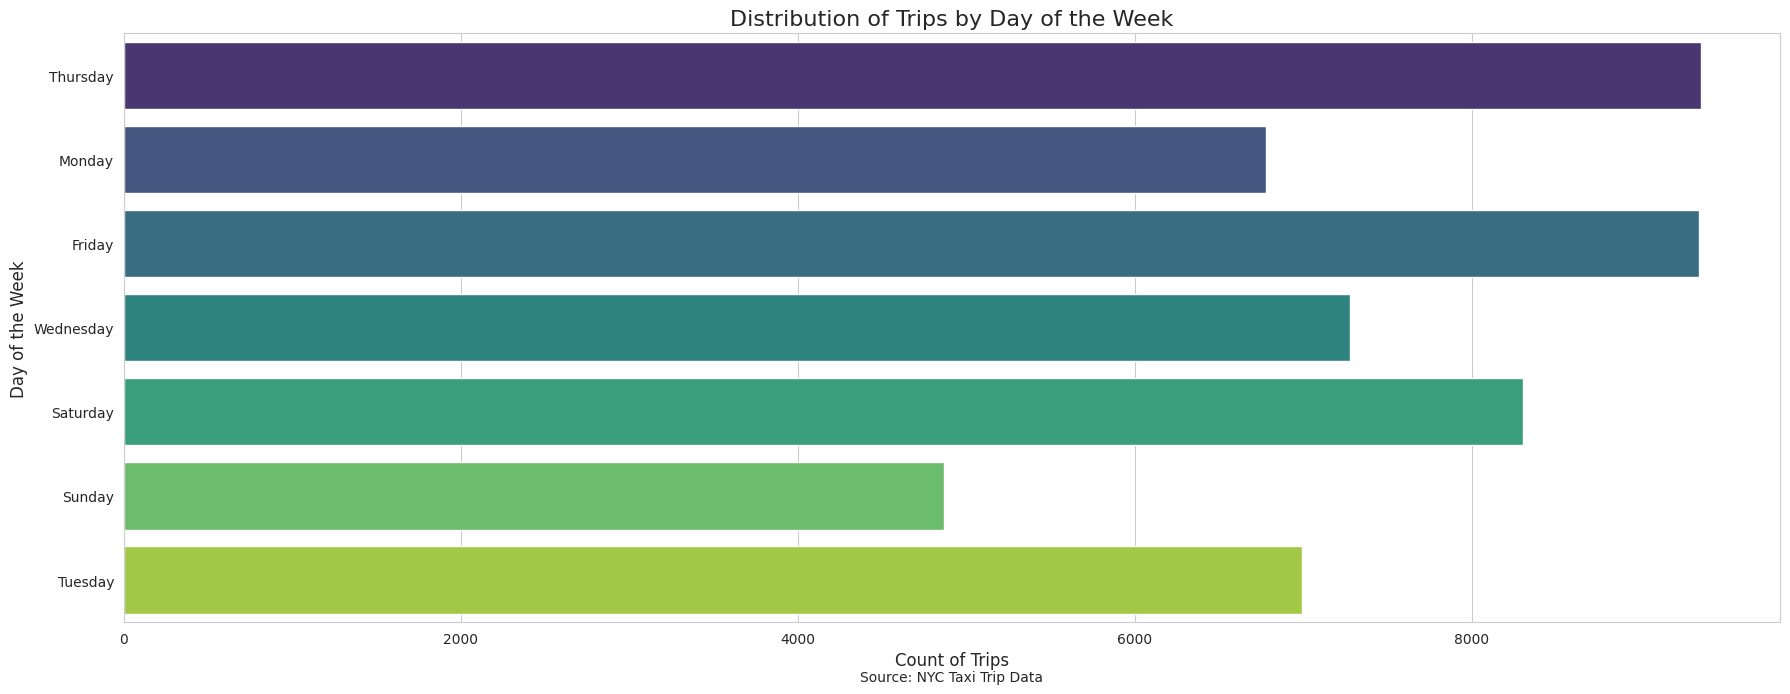

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure with a specified size
plt.figure(figsize=(18, 7))

# Create a count plot
sns.countplot(y='day_of_week', data=trip_data, palette='viridis')

# Set the title and labels with specified font sizes
plt.title('Distribution of Trips by Day of the Week', fontsize=16)
plt.xlabel('Count of Trips', fontsize=12)
plt.ylabel('Day of the Week', fontsize=12)

# Add a text annotation for the data source
plt.text(x=0.5, y=-0.1, s='Source: NYC Taxi Trip Data', fontsize=10, ha='center', transform=plt.gca().transAxes)

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('trip_distribution.png', dpi=300)


**The graph titled "Distribution of Trips by Day of the Week" illustrates the count of taxi trips for each day in New York City. The visualization shows a clear pattern of trip frequency, suggesting variations in taxi demand throughout the week. The most trips are seen on Fridays, indicating a possible increase in social and leisure activities as people welcome the weekend. In contrast, the lowest number of trips occur on Sundays, which could reflect a slower pace as the city winds down before the workweek. The data source is cited as NYC Taxi Trip Data, lending credibility and context to the analysis.**

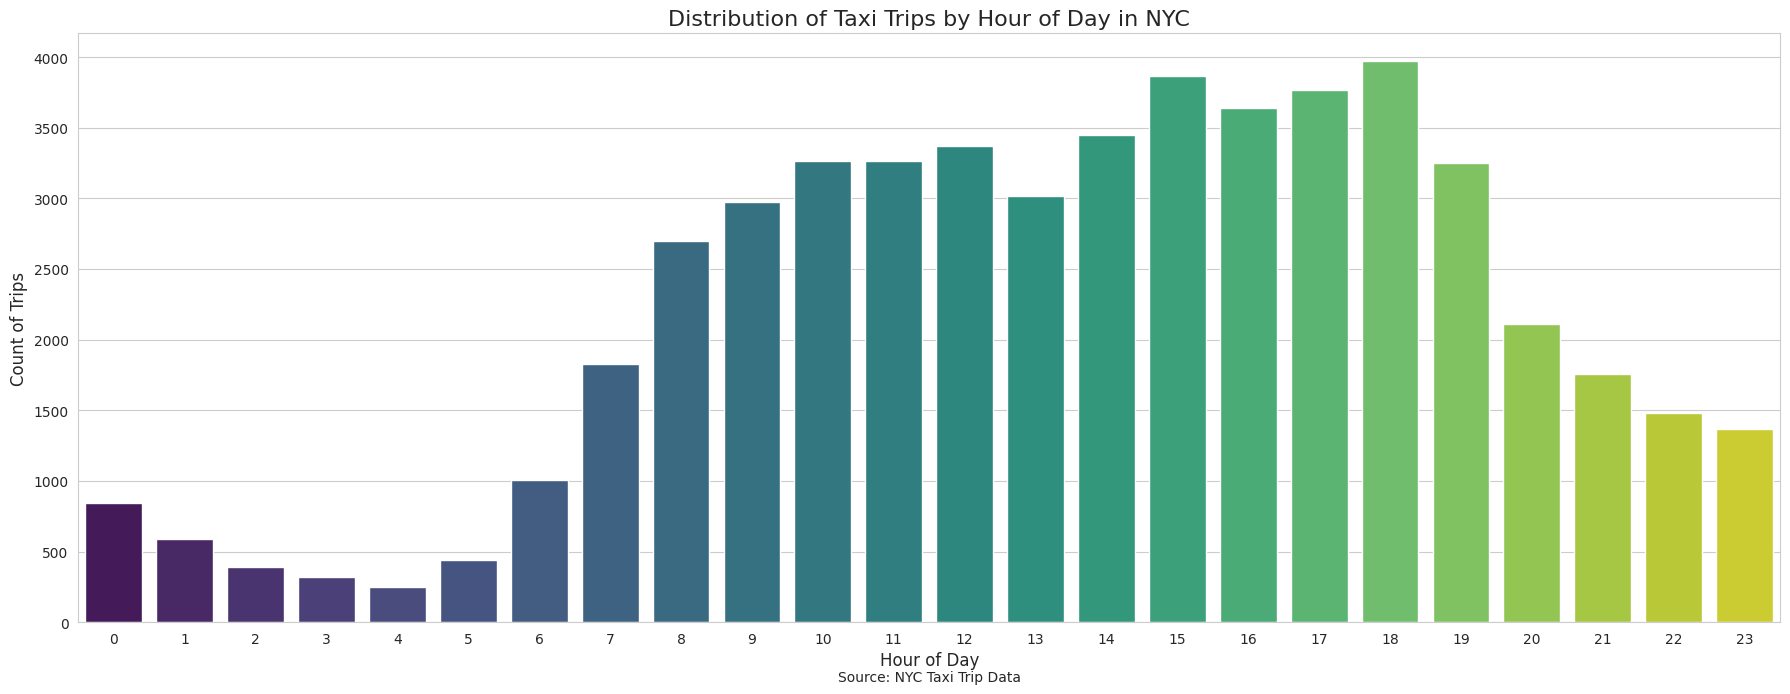

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure with a specified size
plt.figure(figsize=(18, 7))

# Create a count plot using the 'viridis' color palette
sns.countplot(x=trip_data['lpep_pickup_datetime'].dt.hour, data=trip_data, palette='viridis')

# Set labels with specified font sizes and add a title
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Count of Trips', fontsize=12)  # Add y-label for clarity
plt.title('Distribution of Taxi Trips by Hour of Day in NYC', fontsize=16)

# Add a text annotation for the data source
plt.text(x=0.5, y=-0.1, s='Source: NYC Taxi Trip Data', fontsize=10, ha='center', transform=plt.gca().transAxes)

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('hourly_trip_distribution_viridis.png', dpi=300)


**The "Distribution of Taxi Trips by Hour of Day in NYC" graph reveals the hourly dynamics of taxi usage. It shows a progressive increase in trips from the early hours, peaking during the late morning and early afternoon times — typically busy periods of urban commute. Evening hours show a gradual decrease in trips. This pattern underscores the pulse of city life, reflecting work schedules and social habits.**

**Conclusions from these graphs can serve various stakeholders:**

**City Planners and Transport Authorities**: Understanding traffic flow and peak transit times can help optimize traffic management and public transportation schedules.

**Taxi Companies and Ride-Sharing Services**: Data on peak demand hours and quieter days can inform staffing levels, fare pricing strategies, and targeted promotions.

**Business Owners:** Insights into busier days and times could guide hours of operation and staffing, especially for businesses that rely on foot traffic.

**Tourists and Residents:** Knowing the ebb and flow of taxi availability can help in planning outings, commutes, and travel within the city more efficiently.

### **Question 2**
**Is there any correlation between airbnb rentals count and taxi count according to the different neighbourhoods**

In [ ]:
# For the taxi data
unique_neighborhoods_taxi = trip_data['PUZone'].unique()
print("Unique Neighborhoods in Taxi Data:", unique_neighborhoods_taxi)

# For the Airbnb data
unique_neighborhoods_airbnb = airbnb_data['neighbourhood'].unique()
print("Unique Neighborhoods in Airbnb Data:", unique_neighborhoods_airbnb)


Unique Neighborhoods in Taxi Data: ['East Harlem North' 'Fort Greene' 'Central Harlem North' 'Bloomingdale'
 'East Harlem South' 'Elmhurst' 'Central Harlem' 'Morrisania/Melrose'
 'Richmond Hill' 'Astoria' 'Sunnyside' 'Mott Haven/Port Morris' 'Inwood'
 'Melrose South' 'Jamaica' 'Forest Hills' 'Kingsbridge Heights'
 'Bedford Park' 'Old Astoria' 'Hamilton Heights' 'Hunts Point'
 'Jackson Heights' 'Sunset Park East' 'Manhattan Beach'
 'Washington Heights South' 'Baisley Park' 'North Corona'
 'Bloomfield/Emerson Hill' 'Van Cortlandt Park' 'Morningside Heights'
 'Washington Heights North' 'Mount Hope' 'Ridgewood'
 'Soundview/Castle Hill' 'Highbridge' 'Central Park' 'Steinway'
 'Manhattanville' 'Queens Village' 'Norwood' 'Clinton Hill' 'Brownsville'
 'Sheepshead Bay' 'Cobble Hill' 'Briarwood/Jamaica Hills'
 'Brooklyn Heights' 'East Concourse/Concourse Village'
 'Crown Heights North' 'Oakland Gardens' 'JFK Airport' 'Fordham South'
 'Starrett City' 'Co-Op City' 'Brighton Beach' 'Bellerose' 'Kew

In [ ]:
unique_values_taxi_set = set(unique_neighborhoods_taxi)
unique_values_airbnb_set = set(unique_neighborhoods_airbnb)
common_values = unique_values_taxi_set.intersection(unique_values_airbnb_set)

# Print common values
print("Common Unique Values:", common_values)

Common Unique Values: {'Richmond Hill', 'Glen Oaks', 'Greenpoint', 'Bronxdale', 'Longwood', 'Woodhaven', 'Cambria Heights', 'Bellerose', 'West Village', 'Sunnyside', 'Cypress Hills', 'Windsor Terrace', 'Park Slope', 'Arden Heights', 'Inwood', 'Kips Bay', 'Fort Greene', 'Far Rockaway', 'Roosevelt Island', 'Mariners Harbor', 'Astoria', 'Belmont', 'Pelham Bay', 'Gowanus', 'Gravesend', 'Brooklyn Heights', 'Murray Hill', 'Queens Village', 'Manhattan Beach', 'Brighton Beach', 'Kensington', 'Flatlands', 'Norwood', 'Stapleton', 'Kew Gardens', 'Howard Beach', 'Kew Gardens Hills', 'Bay Ridge', 'Clinton Hill', 'Fresh Meadows', 'Elmhurst', 'Ozone Park', 'Whitestone', 'Bayside', 'Forest Hills', 'Red Hook', 'Glendale', 'Jackson Heights', 'Midwood', 'Maspeth', 'Morningside Heights', 'Prospect-Lefferts Gardens', 'Douglaston', 'Jamaica', 'Hollis', 'Chinatown', 'Rego Park', 'Coney Island', 'West Brighton', 'City Island', 'Carroll Gardens', 'South Ozone Park', 'Laurelton', 'Jamaica Estates', 'Highbridge'

In [ ]:
airbnb_data.head()


id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                           no name  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2            unconfirmed     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long  instant_bookable  ... Construction year  price  \
0  40.64749 -73.97237             False  ...            2020.0  $966    
1  40.75362 -73.98377             False  ...            2007.0  $142    
2  40.80902 -73.94190              True  ...            2005.0  $620    
3  40.68514 -73.95976              True  ...            2005.0  $368    
4  40.79851 -73.94399             False  ...            2009.0  $204    

   service fee minimum nights number of reviews  last review  \
0        $193            10.0               9.0   2021-10-19   
1         $28            30.0              45.0   2022-05-21   
2        $124             3.0               0.0   2019-06-23   
3         $74            30.0             270.0   2019-07-05   
4         $41            10.0               9.0   2018-11-19   

   reviews per month review rate number  calculated host listings count  \
0               0.21                4.0                             6.0   
1               0.38                4.0                             2.0   
2               0.03                5.0                             1.0   
3               4.64                4.0                             1.0   
4               0.10                3.0                             1.0   

   availability 365  
0             286.0  
1             228.0  
2             352.0  
3             322.0  
4             289.0  

[5 rows x 22 columns]

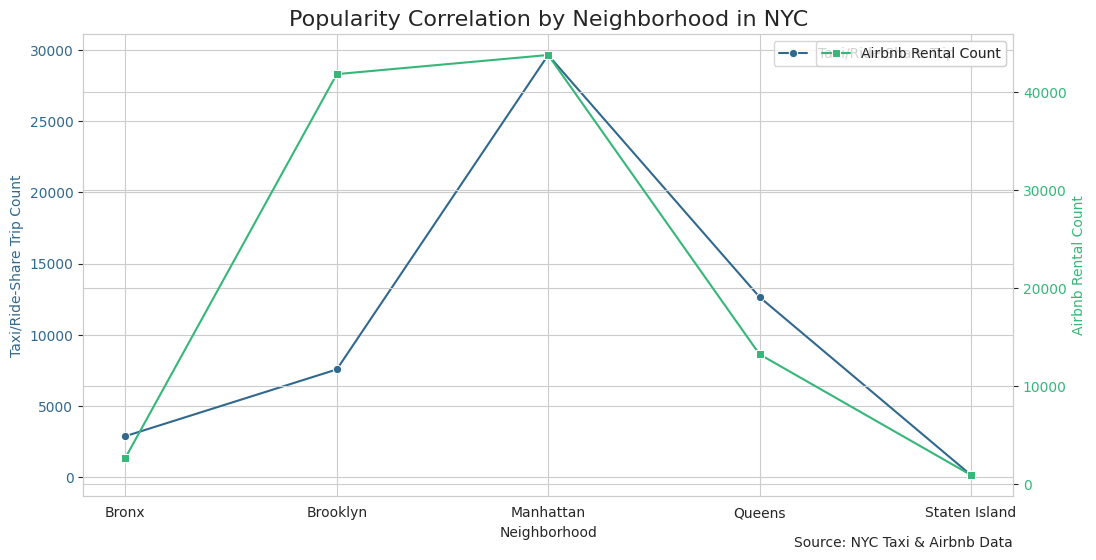

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns



# For Taxi Data
taxi_neighbourhood_count = trip_data.groupby('PUBorough').size().reset_index(name='trip_count')

# For Airbnb Data
airbnb_neighbourhood_count = airbnb_data.groupby('neighbourhood group').size().reset_index(name='rental_count')

# Merge datasets on the appropriate columns
merged_data = pd.merge(taxi_neighbourhood_count, airbnb_neighbourhood_count, left_on='PUBorough', right_on='neighbourhood group')

# Sort the data by neighborhood for better visualization
merged_data = merged_data.sort_values(by='PUBorough')

# Set the color palette
colors = sns.color_palette('viridis', n_colors=2)

# Plot line graph with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot taxi/ride-share trip count on the first y-axis
sns.lineplot(data=merged_data, x='PUBorough', y='trip_count', marker='o', ax=ax1, color=colors[0], label='Taxi/Ride-Share Trip Count')
ax1.set_xlabel('Neighborhood')
ax1.set_ylabel('Taxi/Ride-Share Trip Count', color=colors[0])
ax1.tick_params(axis='y', labelcolor=colors[0])

# Create a second y-axis to plot Airbnb rental count
ax2 = ax1.twinx()
sns.lineplot(data=merged_data, x='PUBorough', y='rental_count', marker='s', ax=ax2, color=colors[1], label='Airbnb Rental Count')
ax2.set_ylabel('Airbnb Rental Count', color=colors[1])
ax2.tick_params(axis='y', labelcolor=colors[1])

# Set the title and add a legend
plt.title('Popularity Correlation by Neighborhood in NYC', fontsize=16)

# Add data source annotations
fig.text(0.9, 0.02, 'Source: NYC Taxi & Airbnb Data', ha='right', va='bottom', fontsize=10)

# Display the plot
plt.show()



From the chart, we can conclude the following:

Manhattan is the most popular neighborhood both in terms of taxi/ride-share usage and Airbnb rentals, which peaks significantly higher than the other neighborhoods. This suggests a high demand for transportation and accommodation, possibly due to tourism, business travel, and the concentration of attractions and amenities.

Brooklyn follows as the second most popular neighborhood, showing substantial activity for both transportation and rental counts, though significantly less than Manhattan.

Queens and Staten Island show lower popularity on these metrics. Queens has a moderate number of taxi/ride-share trips, but the Airbnb rental count is lower. Staten Island has the lowest counts for both metrics, indicating it is the least popular among the neighborhoods listed for both transportation and short-term rentals.

The Bronx has the least taxi/ride-share activity but is not the lowest for Airbnb rentals, suggesting that while it might not be as frequented by taxi or ride-share services, it still maintains a moderate level of attractiveness for short-term accommodation.

The trends indicate that neighborhoods traditionally considered as centers of activity (like Manhattan and Brooklyn) have higher demands for both transportation and accommodation, reflecting their popularity with visitors and possibly residents. In contrast, neighborhoods further from the city center (like Staten Island) or less commonly associated with tourism (like The Bronx) have lower demand in these services.

This kind of data can be valuable for various stakeholders, including city planners, transportation services, real estate investors, and tourism boards, as it provides insights into the distribution of services and can help with making informed decisions regarding resource allocation, marketing strategies, and infrastructure development.

### **Question 3**
**Which neighbourhood has the most number of airbnb rentals**

In [ ]:
import pandas as pd


# Count the number of listings in each neighbourhood
zone_counts = airbnb_data['neighbourhood'].value_counts()

# Find the zone with the most listings
most_popular_zone = zone_counts.idxmax()
most_popular_count = zone_counts.max()

print(f"The zone with the most number of rentals is {most_popular_zone} with {most_popular_count} listings.")


The zone with the most number of rentals is Bedford-Stuyvesant with 7936 listings.


In [ ]:
avg_location = airbnb_data[airbnb_data['neighbourhood'] == most_popular_zone].mean()

<ipython-input-96-75d9799ef877>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  avg_location = airbnb_data[airbnb_data['neighbourhood'] == most_popular_zone].mean()
<ipython-input-96-75d9799ef877>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  avg_location = airbnb_data[airbnb_data['neighbourhood'] == most_popular_zone].mean()


In [ ]:
import folium


m = folium.Map(location=[avg_location['lat'], avg_location['long']], zoom_start=12)

# Add a marker with a color from the 'viridis' palette
folium.Marker(
    location=[avg_location['lat'], avg_location['long']],
    popup=folium.Popup(most_popular_zone, max_width=300),
    icon=folium.Icon(color='darkblue', icon='info-sign')
).add_to(m)

# Display the map
m



###**Question 4**
**What are the high-density areas for Airbnb rentals in the city, and how do they correlate with tourist attractions, public transportation, or other amenities?**

In [ ]:
import folium
from folium.plugins import HeatMap

# Custom gradient
gradient = {
    0.0: 'blue',   # Low density
    0.4: 'cyan',
    0.6: 'lime',
    0.8: 'yellow',
    1.0: 'red'     # High density
}

# Setup map
m = folium.Map(location=[airbnb_data['lat'].mean(), airbnb_data['long'].mean()], zoom_start=12)

# Heatmap data
heat_data = [[row['lat'], row['long']] for index, row in airbnb_data.iterrows()]

# Add HeatMap to the map
HeatMap(heat_data, gradient=gradient, radius=8, blur=10).add_to(m)

# Display the map
m


**How does the density of Airbnb rentals in different areas correlate with the pricing trends? Are more densely populated rental areas more expensive?**

In [ ]:
import pandas as pd
import plotly.express as px


# Convert 'price' column to string and then to numeric
airbnb_data['price'] = pd.to_numeric(airbnb_data['price'].astype(str).str.replace('$', '').str.replace(',', ''), errors='coerce')

# Approximate density by counting the number of listings in each latitude and longitude
# This is a simplified approach to demonstrate the concept
airbnb_data['count'] = airbnb_data.groupby(['lat', 'long'])['price'].transform('count')

# Create a scatter plot on a map using Plotly with size representing the count of listings
fig = px.scatter_mapbox(airbnb_data, lat="lat", lon="long", size="count", color="price",
                        color_continuous_scale=px.colors.sequential.Viridis, size_max=10, zoom=10,
                        mapbox_style="carto-positron")

fig.show()


<ipython-input-102-4ad625afde1d>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  airbnb_data['price'] = pd.to_numeric(airbnb_data['price'].astype(str).str.replace('$', '').str.replace(',', ''), errors='coerce')


In the plot, each dot represents an Airbnb listing. The size of the dots corresponds to the number of listings in that location, indicating the density of available properties. The color of the dots represents the price range, with the color scale on the right-hand side providing a reference for the price values associated with each color.

From the visualization, we can observe clusters of listings and get an idea of where higher-priced and lower-priced rentals are concentrated. For example, areas with a high density of dark green dots would be locations with a high number of expensive listings, while areas with more purple dots would indicate more affordable listings.

This kind of visualization can be very useful for both customers looking to find a place to stay and for rental owners to analyze the market competition and pricing strategies. It can also be insightful for urban studies regarding housing density and accommodation pricing in relation to city geography.

##**Question 5**
**Is there any correlation between the pick up and drop off neighborhoods?**

In [ ]:
trip_counts = trip_data.groupby(['PUBorough', 'DOBorough']).size().reset_index(name='TripCount')

In [ ]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.palettes import Viridis as palette
from bokeh.layouts import layout
from bokeh.models.annotations import Title


sources = {borough: ColumnDataSource(trip_counts[trip_counts['PUBorough'] == borough])
           for borough in unique_puboroughs}

# Define a color iterator from the viridis palette with enough colors
color_iter = palette[len(unique_puboroughs)]

p = figure(title="Correlation Between Pickup and Dropoff Boroughs in NYC",
           x_range=unique_doboroughs,
           y_range=(0, trip_counts['TripCount'].max()),
           sizing_mode="stretch_width",
           height=350)

# Add lines and circles for each borough using its specific source and color
for (color, (borough, source)) in zip(color_iter, sources.items()):
    p.line(x='DOBorough', y='TripCount', source=source, line_width=2, color=color, legend_label=borough)
    p.circle(x='DOBorough', y='TripCount', source=source, size=8, color=color)

p.xaxis.axis_label = "Dropoff Borough"
p.yaxis.axis_label = "Number of Trips"
p.legend.title = 'Pickup Borough'

# Add the hover tool
hover = HoverTool(tooltips=[('Borough', '@PUBorough'), ('Dropoff', '@DOBorough'), ('Trips', '@TripCount')])
p.add_tools(hover)

# Add the layout
l = layout([p], sizing_mode='stretch_both')

# Add data source annotations
p.add_layout(Title(text="Source: NYC Taxi Trip Data", align="right"), "below")

# Show the plot
show(l)



**The graph titled "Correlation Between Pickup and Dropoff Boroughs in NYC" depicts the flow of taxi trips between different boroughs. It highlights significant inter-borough connectivity, especially with trips originating from Manhattan. A notable observation is the high volume of trips both to and from Manhattan, underscoring its centrality to NYC's taxi network. The other boroughs show varied patterns, with Staten Island having minimal connections compared to others. This data is valuable for urban planners and transportation services to understand and address the transit demands across NYC**

## **Question 6**


**Using Google's natural language processing to perform sentiment analysis on the 'Name' column (which is also like a description) of the airbnb dataset to find out if there is a correlation between the sentiment score and number of reviews for an airbnb rental**

In [ ]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/content/macro-spider-400100-e5f264925a5c.json"


In [ ]:
!pip install --upgrade google-cloud-language

In [ ]:
!pip install langdetect


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993225 sha256=a89a45ea15bd58b1e916018b0dc96223fd46666a113d5d8007c4bca3795bba38
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
sample_data = airbnb_data.sample(n=500)

In [ ]:
import pandas as pd
from google.cloud import language_v1

# Function to analyze sentiment
def analyze_sentiment(text_content):
    client = language_v1.LanguageServiceClient()
    document = language_v1.Document(content=text_content, type_=language_v1.Document.Type.PLAIN_TEXT)
    response = client.analyze_sentiment(document=document)
    sentiment = response.document_sentiment
    return sentiment.score

# Sample a subset of your data for quicker analysis
sample_data = airbnb_data.sample(n=500)  # Adjust 'n' as needed

# Analyze sentiment for each listing name in the sample and store the results
sample_data['sentiment_score'] = sample_data['NAME'].apply(analyze_sentiment)

# Calculate the correlation on the sampled data
correlation = sample_data['sentiment_score'].corr(sample_data['number of reviews'])
print(f"Correlation between sentiment score and number of reviews (sampled data): {correlation}")


Correlation between sentiment score and number of reviews (sampled data): -0.02566617565343164


**The correlation score of approximately -0.0257 between sentiment score and the number of reviews in the sampled data suggests a very weak negative correlation between these two variables. Here's what this correlation score indicates:**

Strength of Correlation: The correlation score of -0.0257 is very close to zero. This suggests that there is almost no linear relationship between the sentiment score and the number of reviews in your data.

Direction of Correlation: The negative sign of the correlation score indicates a slight negative correlation, but the magnitude is so small that it's not practically significant.

In practical terms, this correlation score suggests that changes in sentiment score are not linearly related to changes in the number of reviews. In other words, the sentiment expressed in reviews does not appear to be strongly influenced by the quantity of reviews. Other factors or variables may have a more significant impact on sentiment.

#**D4. Summary of key findings**

1. After carefully analysing the trip_data we can conclude that the busiest weekday in terms of taxi trips is Friday and the busiest hour of the day is roughly 18:00 or 6 p.m.
2. Manhattan is the most popular neighborhood both in terms of taxi/ride-share usage and Airbnb rentals.
3. The trends indicate that neighborhoods traditionally considered as centers of activity (like Manhattan and Brooklyn) have higher demands for both transportation and accommodation, reflecting their popularity with visitors and possibly residents. In contrast, neighborhoods further from the city center (like Staten Island) or less commonly associated with tourism (like The Bronx) have lower demand in these services.
4. Manhattan appears to be the most significant hub for both pickups and dropoffs.
5. The Bronx, Staten Island, and EWR have a relatively low number of trips originating from them, suggesting these areas are either less connected by the modes of transport in the data set or there is less demand for trips from these areas.
6. The name of the airbnb listing (which is also like a description) has little or no influence on the number of reviews it receives.



#**D5. Further Research**

To draw more detailed conclusions, it would be beneficial to investigate the reasons behind these patterns, such as residential and commercial distributions, tourist attractions, or cultural events.

Expand the scope to include other modes of transportation, such as public transit usage, bike-sharing services, and walking patterns. How do these modes correlate with short-term rental pattern.

How do income levels, demographic profiles, and housing density affect these trends?

#**Personal Learnings**

1. Instead of direclty using Kaggle API key in my code, I have used the kaggle json file containing userid and password and used the SPECIAL commands to save the file and use my KEY from that.
2. Using a piece of code to find out the percentage of null values for each of the columns for the dataset to have a clearer picture and accordingly using the appropriate method to deal with the missing values.
3. Using human insights to understand the data and keeping in mind how some values like distance,amount cannot be negative. My data had a a lot of negative values and if i hadn't taken the absolute values I would have got a wrong analysis.
4. Mapping location ids using a lookup csv file otherwise the analysis would not have been possible.
5. Using batch Processing to process the data in batches instead of row by row. This reduces the overhead of API calls but requires handling the data differently.

#**Methodologies incorporated**

1. Devised six interesting questions to guide my data analysis, and answered them.

2. Used Google Maps API to plot geospatial data on a map
3. Used Google's Natural Language Understanding API to analyze text data for sentiment and emotion.  
4. Visualized a key insight using a refined multivariate matplotlib chart: https://matplotlib.org/
stable/gallery/index.html.
5. Visualized a key insight using an interactive Bokeh chart: https://docs.bokeh.org/en/latest/docs/
gallery.html#id3, matplot lib, seaborn, etc.
6. Used kaggle API to direclty import the data.
7. Maintained the same color theme throughout.